**Data Set Information:**

The dataset is obtained from [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008) represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

Our problem is to predict when a person will to be readmited in the hospital.

In [25]:
import numpy as np #Linear algebra
import pandas as pd #Data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

#Download Dataset
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
!unzip /content/dataset_diabetes.zip

In [26]:
#loading Dataset
data = pd.read_csv("/content/dataset_diabetes/diabetic_data.csv")
#Checking data types of each variable
print('Data shape: {}'.format(data.shape))
print(data.dtypes)
#Checking shape and displaying first 10 rows of data
data.head(10).T

Data shape: (101766, 50)
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              ob

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


There are 50 characteristics that contains numerical and categorical variables, also any values with '?', for which we have to do data processing, for this we could do graphical, numerical analysis of the relationship between the variables or how they influence readmission, the interaction between factors, etc. However, this is not the objective of the project and taking advantage of the fact that it is a database that has been used in several articles, we will take the most important ones that are mentioned in said articles.

The characteristic information is in [List of features and their descriptions in the initial dataset](https://www.hindawi.com/journals/bmri/2014/781670/tab1/)

Encoding the outcome variable: The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not. The variable actually has < 30, > 30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

In [27]:
#Explored the outcome variable
print('Categorical outcome variable:\n{}'.format(data['readmitted'].value_counts()))

data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

#Explored the outcome variable
print('Binarian outcome variable:\n{}'.format(data['readmitted'].value_counts()))

Categorical outcome variable:
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
Binarian outcome variable:
0    90409
1    11357
Name: readmitted, dtype: int64


In [28]:
data = data[['patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
               'time_in_hospital', 'number_diagnoses', 'num_lab_procedures', 'num_procedures', 'num_medications',
               'diag_1', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
               'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']]
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in data.columns:
    if data[col].dtype == object:
         print(col,data[col][data[col] == '?'].count())

# gender was coded differently so we use a custom count for this one            
print('gender', data['gender'][data['gender'] == 'Unknown/Invalid'].count())

race 2273
gender 0
age 0
diag_1 21
max_glu_serum 0
A1Cresult 0
metformin 0
glimepiride 0
glipizide 0
glyburide 0
pioglitazone 0
rosiglitazone 0
insulin 0
change 0
diabetesMed 0
gender 3


We find that some variables that race, diag_1 and gender have missng values, in the next notebook treat it.

We also define a method to plot the distribution of output classes because we need it to analyze at various points in the project.

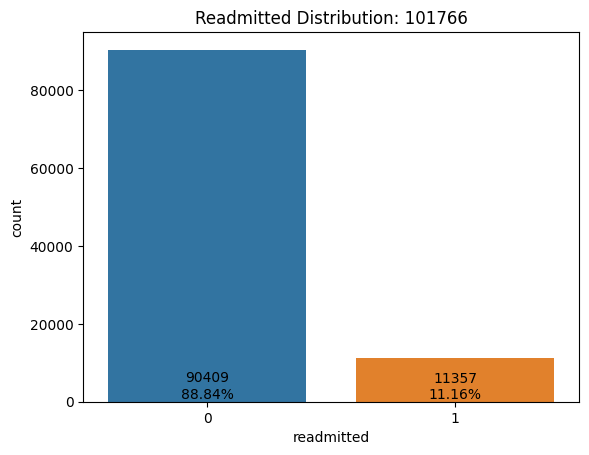

In [29]:
# Classes distribution
readmitted_counts = data['readmitted'].value_counts()
bars = round(data['readmitted'].value_counts(normalize=True)[[0, 1]] * 100, 2).values

sns.countplot(x=data["readmitted"]).set_title('Readmitted Distribution: '+str(data.shape[0]))

# Labels
for i, bar in enumerate(bars):
    plt.annotate(str(readmitted_counts[i])+'\n'+str(bar)+'%', xy=(i, bar), ha='center', va='bottom')
plt.show()

We see that we have a data imbalance which must be corrected before training the model so as not to affect its performance or bias it towards predicting a single class.

In [23]:
from google.colab import drive

drive.mount('/content/drive')
data.to_csv('/content/drive/MyDrive/data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
